# Project 3&4 EDA and ML
## Oeson Global Training and Internship
### Data Science Intern
#### Arsalan Zaid
#### Intern Code - OGTIPDSAZJ82

In [1]:
#conda update conda

In [2]:
#conda install scikit-learn= 1.3.0

In [3]:
#$ conda update -n base -c defaults conda

In [4]:
#!pip install --upgrade scikit-learn

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder



# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px




# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


#Metrics calculation 
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, PrecisionRecallDisplay
from sklearn.metrics import auc, roc_auc_score,  RocCurveDisplay


In [6]:
df = pd.read_csv("Student_academic.csv")

In [7]:
new_df = df.copy()

In [8]:
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [9]:
df.size

154840

In [10]:
df.shape

(4424, 35)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [12]:
#Finding missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [13]:
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [14]:
#Columns of data
df.columns.values

array(['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Nacionality', "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [15]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [16]:
print(df["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [17]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

### EDA (exploratory data analysis)

Total course 17


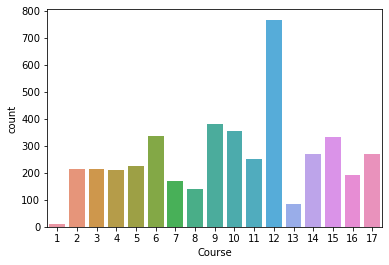

In [18]:
#Univariate analysis
sns.countplot(df['Course'])
course = round((df['Course'].value_counts().values[0]/4424)*100)
print("Total course", course)

Percentage of the students have attended the lectures 89 %


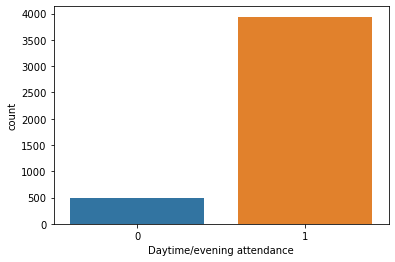

In [19]:
#Univariate analysis
sns.countplot(df['Daytime/evening attendance'])
attendance = round((df['Daytime/evening attendance'].value_counts().values[0]/4424)*100)
print("Percentage of the students have attended the lectures", attendance,"%")

Percentage of Students having previous qualification 84 %


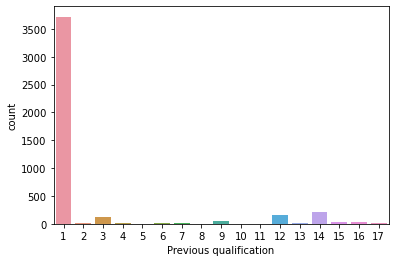

In [20]:

#Univariate analysis
sns.countplot(df['Previous qualification'])
qualification = round((df['Previous qualification'].value_counts().values[0]/4424)*100)
print("Percentage of Students having previous qualification", qualification,"%")

Percentage of Students having no debt 89 %


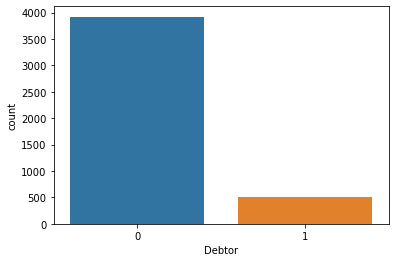

In [21]:
#Univariate analysis
sns.countplot(df['Debtor'])
debt = round((df['Debtor'].value_counts().values[0]/4424)*100)
print("Percentage of Students having no debt", debt,"%")

Percentage of Students having tution fees up to date 88 %


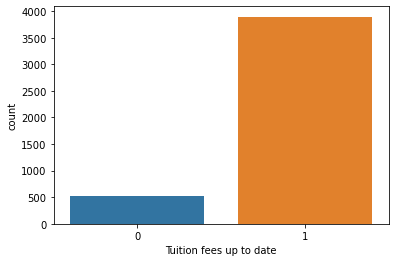

In [22]:
#Univariate analysis
sns.countplot(df['Tuition fees up to date'])
fees = round((df['Tuition fees up to date'].value_counts().values[0]/4424)*100)
print("Percentage of Students having tution fees up to date", fees,"%")

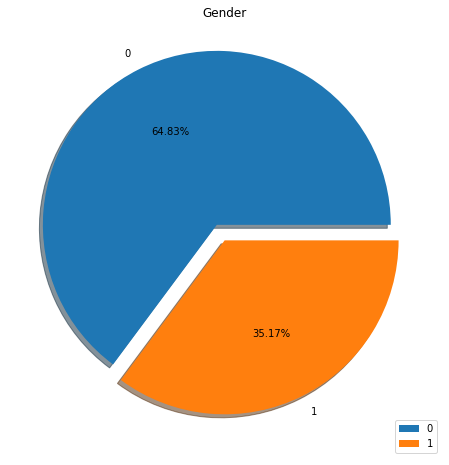

In [23]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

Percentage of Students marrital status 84 %


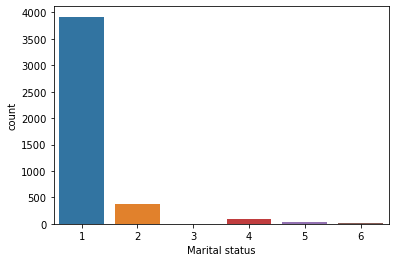

In [24]:
#Univariate analysis
sns.countplot(df['Marital status'])
maritul_status = round((df['Marital status'].value_counts().values[0]/4424)*100)
print("Percentage of Students marrital status", qualification,"%")

Percentage of Students are not Scholarship holder 75 %


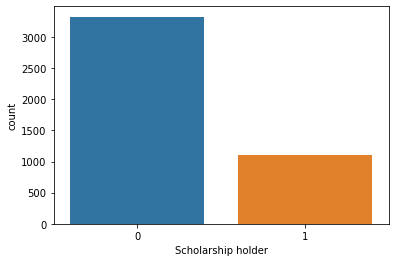

In [25]:
#Univariate analysis
sns.countplot(df['Scholarship holder'])
scholarship_holder = round((df['Scholarship holder'].value_counts().values[0]/4424)*100)
print("Percentage of Students are not Scholarship holder", scholarship_holder,"%")

Percentage of Students are International 98 %


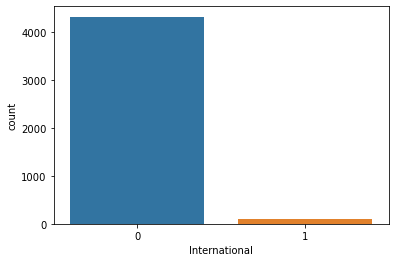

In [26]:

#Univariate analysis
sns.countplot(df['International'])
international = round((df['International'].value_counts().values[0]/4424)*100)
print("Percentage of Students are International", international,"%")

<AxesSubplot:xlabel='Gender', ylabel='count'>

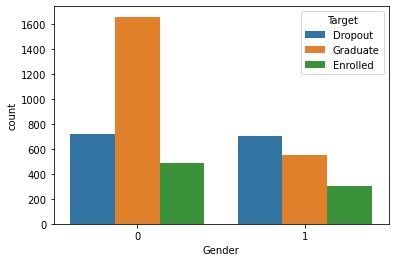

In [27]:
sns.countplot(data=df, x="Gender", hue="Target")

<AxesSubplot:xlabel='Scholarship holder', ylabel='count'>

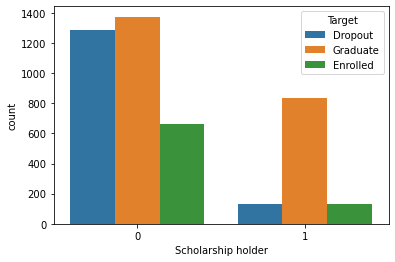

In [28]:

sns.countplot(data=df, x="Scholarship holder", hue="Target")

<AxesSubplot:xlabel='Unemployment rate', ylabel='count'>

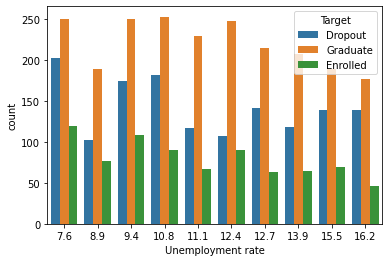

In [29]:

sns.countplot(data=df, x="Unemployment rate", hue="Target")

In [30]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

In [31]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

<AxesSubplot:xlabel='Age at enrollment'>

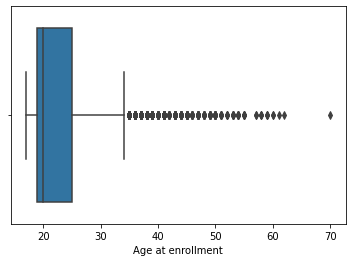

In [32]:
sns.boxplot(df['Age at enrollment'])


In [33]:
px.histogram(df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['red'])

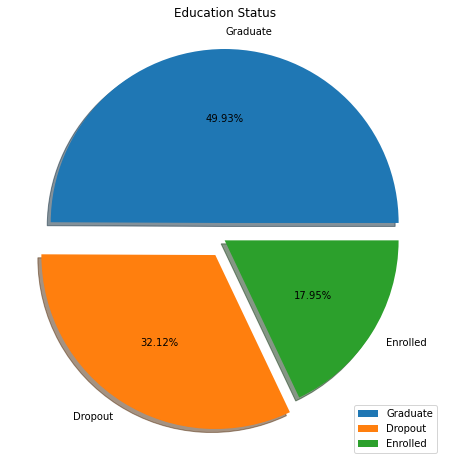

In [34]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

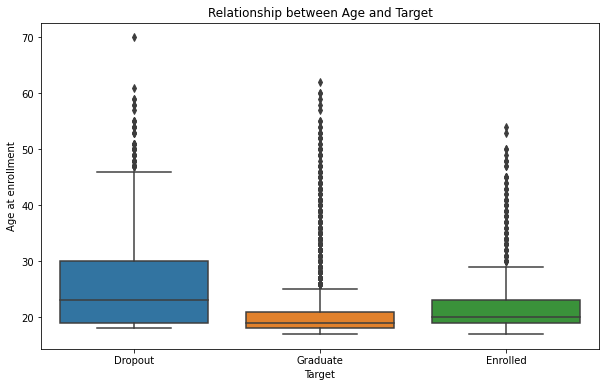

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=df)
plt.xlabel('Target')
plt.ylabel('Age at enrollment')
plt.title('Relationship between Age and Target')
plt.show()

In [36]:
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

In [37]:
labels = pd.Series(le.classes_)
pd.DataFrame(labels)

0
0   Dropout
1  Enrolled
2  Graduate

In [38]:
df["Target"]

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int32

### Feature Engineering(Feature Exctraction, Feature Selection, PCA)

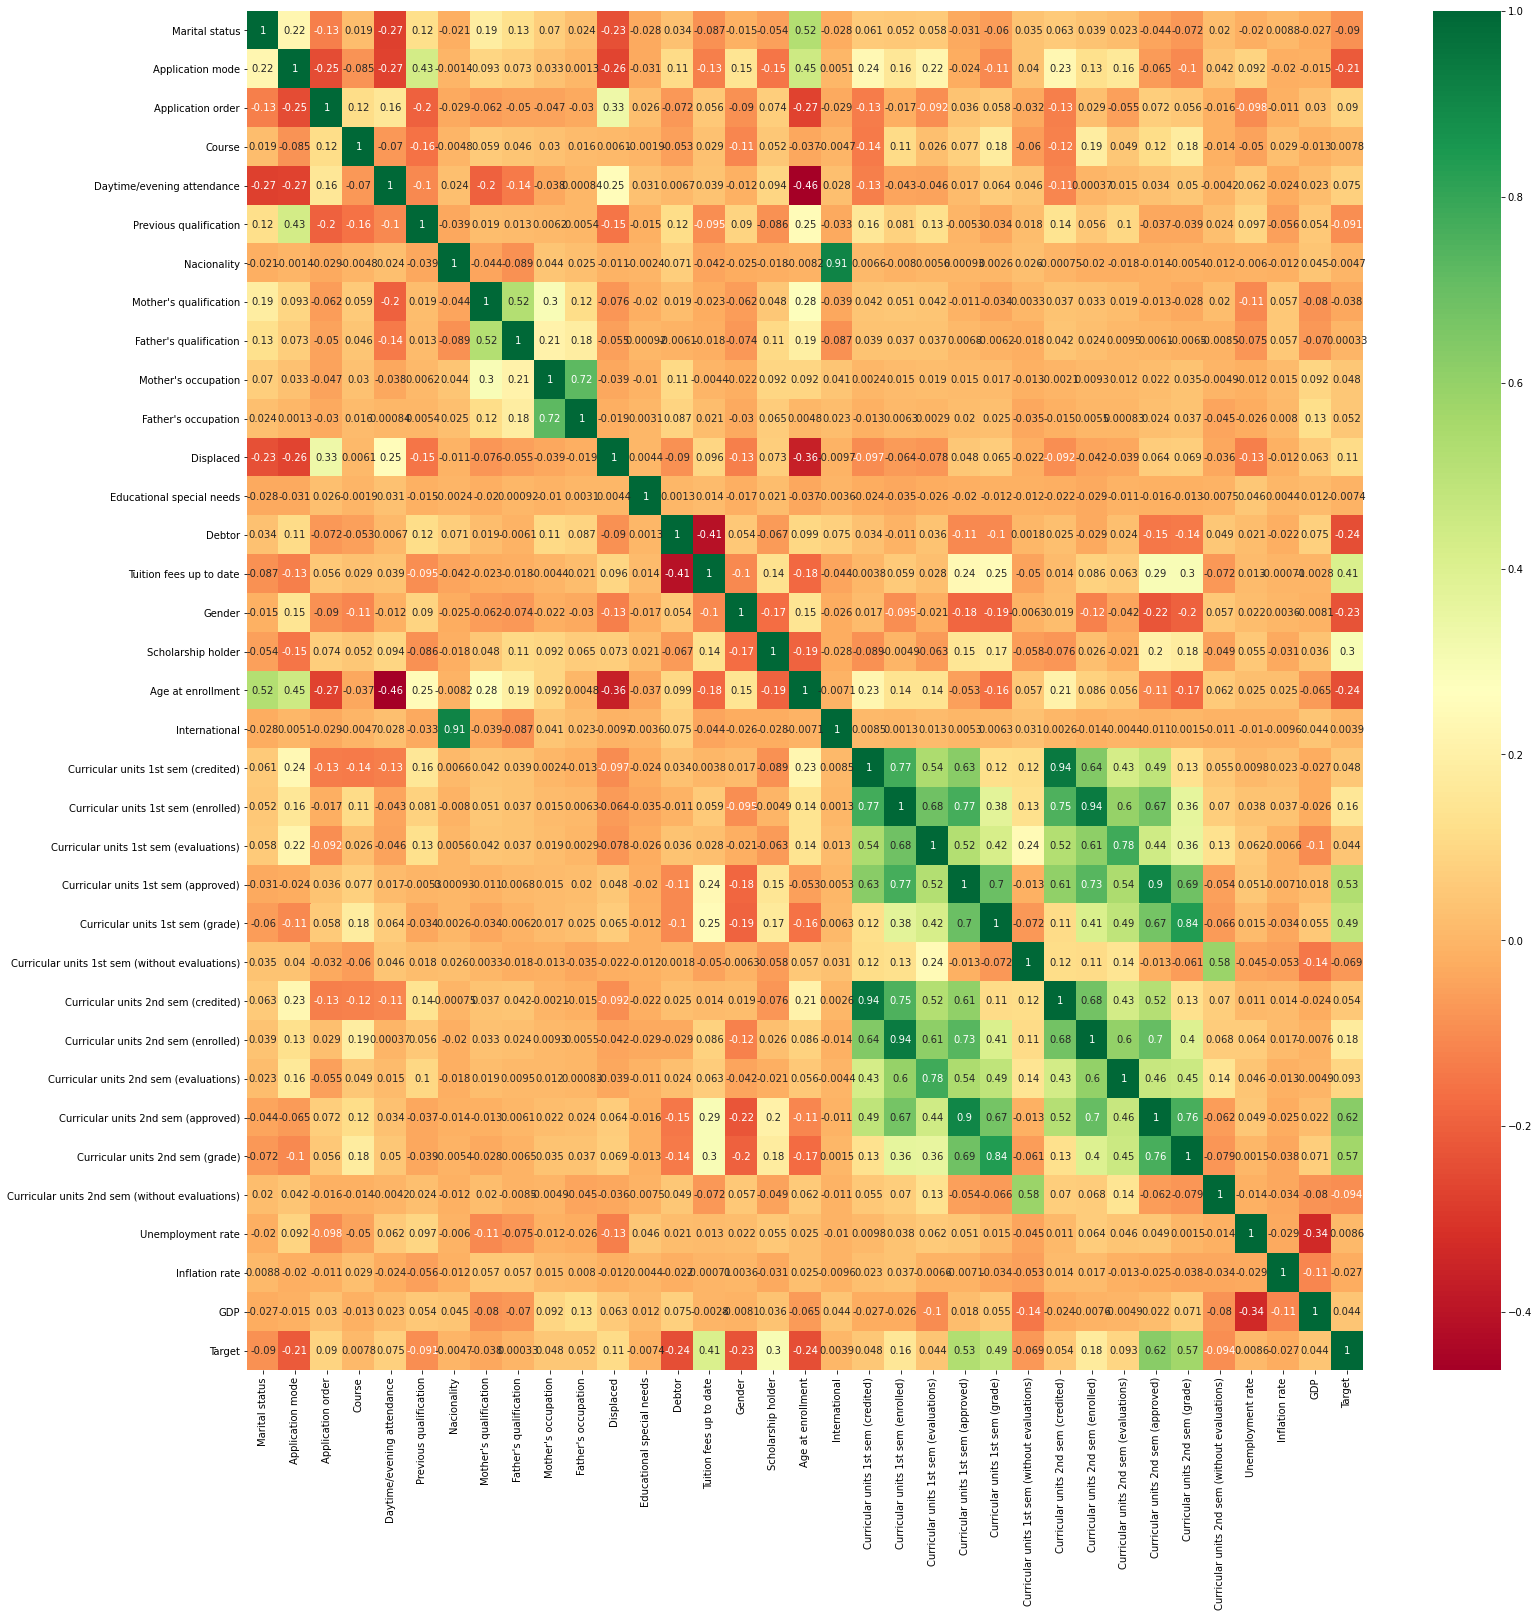

In [39]:
corrmat = df.corr()
top_features = corrmat.index
plt.figure(figsize = (25,25))
#plot heat map
heat_meap = sns.heatmap(df[top_features].corr(), annot = True , cmap = "RdYlGn")

In [40]:
list1 = list(df.columns)
label_a = []
label_b = []
final_list = []
for i in range(0,len(list1)):
    for j in range(i+1,len(list1)):
        label_a.append(list1[i])
        label_b.append(list1[j])
        x = df[list1[i]].corr(df[list1[j]],method = "pearson")
        final_list.append(x)
data = {'Feature A':label_a, 'Feature B':label_b, 'correlation':final_list}


In [41]:
corr = pd.DataFrame(data)
corr

Feature A                   Feature B  correlation
0       Marital status            Application mode     0.224855
1       Marital status           Application order    -0.125854
2       Marital status                      Course     0.018925
3       Marital status  Daytime/evening attendance    -0.274939
4       Marital status      Previous qualification     0.120925
..                 ...                         ...          ...
590  Unemployment rate                         GDP    -0.335178
591  Unemployment rate                      Target     0.008627
592     Inflation rate                         GDP    -0.112295
593     Inflation rate                      Target    -0.026874
594                GDP                      Target     0.044135

[595 rows x 3 columns]

In [42]:
corr = corr.sort_values('correlation', ascending = False)
corr.head(15)

Feature A  \
480     Curricular units 1st sem (credited)   
495     Curricular units 1st sem (enrolled)   
200                             Nacionality   
522     Curricular units 1st sem (approved)   
534        Curricular units 1st sem (grade)   
509  Curricular units 1st sem (evaluations)   
475     Curricular units 1st sem (credited)   
491     Curricular units 1st sem (enrolled)   
574     Curricular units 2nd sem (approved)   
494     Curricular units 1st sem (enrolled)   
520     Curricular units 1st sem (approved)   
270                     Mother's occupation   
560     Curricular units 2nd sem (enrolled)   
517     Curricular units 1st sem (approved)   
523     Curricular units 1st sem (approved)   

                                  Feature B  correlation  
480     Curricular units 2nd sem (credited)     0.944811  
495     Curricular units 2nd sem (enrolled)     0.942627  
200                           International     0.911724  
522     Curricular units 2nd sem (approved)     0.904002  
534        Curricular units 2nd sem (grade)     0.837170  
509  Curricular units 2nd sem (evaluations)     0.778863  
475     Curricular units 1st sem (enrolled)     0.774344  
491     Curricular units 1st sem (approved)     0.769083  
574        Curricular units 2nd sem (grade)     0.760804  
494     Curricular units 2nd sem (credited)     0.753747  
520     Curricular units 2nd sem (enrolled)     0.733772  
270                     Father's occupation     0.724007  
560     Curricular units 2nd sem (approved)     0.703258  
517        Curricular units 1st sem (grade)     0.696113  
523        Curricular units 2nd sem (grade)     0.685560

In [43]:
final_df = df.drop(['Curricular units 1st sem (credited)',
                        "Curricular units 1st sem (enrolled)", 
                        "Nacionality","Curricular units 1st sem (approved)", 
                        "Curricular units 1st sem (grade)",
                       "Curricular units 1st sem (evaluations)",
                       "Curricular units 2nd sem (approved)",
                       "Mother's occupation",
                       "Father's occupation",
                       "Curricular units 2nd sem (enrolled)"],axis =1)

In [44]:
final_df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Mother's qualification  Father's qualification  Displaced  \
0                         13                      10          1   
1                          1                       3          1   
2                         22                      27          1   
3                         23                      27          1   
4                         22                      28          0   
...                      ...                     ...        ...   
4419                       1                       1          0   
4420                       1                       1          1   
4421                      22                      27          1   
4422                      22                      27          1   
4423                      23                      27          1   

      Educational special needs  ...  International  \
0                             0  ...              0   
1                             0  ...              0   
2                             0  ...              0   
3                             0  ...              0   
4                             0  ...              0   
...                         ...  ...            ...   
4419                          0  ...              0   
4420                          0  ...              1   
4421                          0  ...              0   
4422                          0  ...              0   
4423                          0  ...              1   

      Curricular units 1st sem (without evaluations)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
4419                                               0   
4420                                               0   
4421                                               0   
4422                                               0   
4423                                               0   

      Curricular units 2nd sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
44

In [45]:

features = final_df.columns.drop('Target')
features


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [46]:
scaler = StandardScaler()
final_df[features] = scaler.fit_transform(final_df[features])
final_df

Marital status  Application mode  Application order    Course  \
0          -0.294829          0.210069           2.490896 -1.823744   
1          -0.294829         -0.167406          -0.554068  0.254153   
2          -0.294829         -1.111094           2.490896 -1.131112   
3          -0.294829          0.210069           0.207173  1.177663   
4           1.356212          0.965018          -0.554068 -1.592866   
...              ...               ...                ...       ...   
4419       -0.294829         -1.111094           3.252137  1.177663   
4420       -0.294829         -1.111094           0.207173  1.177663   
4421       -0.294829         -1.111094          -0.554068  0.485030   
4422       -0.294829         -1.111094          -0.554068 -0.207602   
4423       -0.294829         -0.356144          -0.554068  1.177663   

      Daytime/evening attendance  Previous qualification  \
0                       0.350082               -0.386404   
1                       0.350082               -0.386404   
2                       0.350082               -0.386404   
3                       0.350082               -0.386404   
4                      -2.856470               -0.386404   
...                          ...                     ...   
4419                    0.350082               -0.386404   
4420                    0.350082               -0.386404   
4421                    0.350082               -0.386404   
4422                    0.350082               -0.386404   
4423                    0.350082               -0.386404   

      Mother's qualification  Father's qualification  Displaced  \
0                   0.075111               -0.584526   0.907512   
1                  -1.254495               -1.218380   0.907512   
2                   1.072315                0.954834   0.907512   
3                   1.183116                0.954834   0.907512   
4                   1.072315                1.045384  -1.101914   
...                      ...                     ...        ...   
4419               -1.254495               -1.399481  -1.101914   
4420               -1.254495               -1.399481   0.907512   
4421                1.072315                0.954834   0.907512   
4422                1.072315                0.954834   0.907512   
4423                1.183116                0.954834   0.907512   

      Educational special needs  ...  International  \
0                     -0.107993  ...      -0.159682   
1                     -0.107993  ...      -0.159682   
2                     -0.107993  ...      -0.159682   
3                     -0.107993  ...      -0.159682   
4                     -0.107993  ...      -0.159682   
...                         ...  ...            ...   
4419                  -0.107993  ...      -0.159682   
4420                  -0.107993  ...       6.262442   
4421                  -0.107993  ...      -0.159682   
4422                  -0.107993  ...      -0.159682   
4423                  -0.107993  ...       6.262442   

      Curricular units 1st sem (without evaluations)  \
0                                          -0.199273   
1                                          -0.199273   
2                                          -0.199273   
3                                          -0.199273   
4                                          -0.199273   
...                                              ...   
4419                                       -0.199273   
4420                                       -0.199273   
4421                                       -0.199273   
4422                                       -0.199273   
4423                                       -0.199273   

      Curricular units 2nd sem (credited)  \
0                               -0.282442   
1                               -0.282442   
2                               -0.282442   
3                               -0.282442   
4                               -0.282442   
...                    

In [47]:
final_df.drop(final_df[final_df['Target'] == 1].index, inplace = True)
final_df

Marital status  Application mode  Application order    Course  \
0          -0.294829          0.210069           2.490896 -1.823744   
1          -0.294829         -0.167406          -0.554068  0.254153   
2          -0.294829         -1.111094           2.490896 -1.131112   
3          -0.294829          0.210069           0.207173  1.177663   
4           1.356212          0.965018          -0.554068 -1.592866   
...              ...               ...                ...       ...   
4419       -0.294829         -1.111094           3.252137  1.177663   
4420       -0.294829         -1.111094           0.207173  1.177663   
4421       -0.294829         -1.111094          -0.554068  0.485030   
4422       -0.294829         -1.111094          -0.554068 -0.207602   
4423       -0.294829         -0.356144          -0.554068  1.177663   

      Daytime/evening attendance  Previous qualification  \
0                       0.350082               -0.386404   
1                       0.350082               -0.386404   
2                       0.350082               -0.386404   
3                       0.350082               -0.386404   
4                      -2.856470               -0.386404   
...                          ...                     ...   
4419                    0.350082               -0.386404   
4420                    0.350082               -0.386404   
4421                    0.350082               -0.386404   
4422                    0.350082               -0.386404   
4423                    0.350082               -0.386404   

      Mother's qualification  Father's qualification  Displaced  \
0                   0.075111               -0.584526   0.907512   
1                  -1.254495               -1.218380   0.907512   
2                   1.072315                0.954834   0.907512   
3                   1.183116                0.954834   0.907512   
4                   1.072315                1.045384  -1.101914   
...                      ...                     ...        ...   
4419               -1.254495               -1.399481  -1.101914   
4420               -1.254495               -1.399481   0.907512   
4421                1.072315                0.954834   0.907512   
4422                1.072315                0.954834   0.907512   
4423                1.183116                0.954834   0.907512   

      Educational special needs  ...  International  \
0                     -0.107993  ...      -0.159682   
1                     -0.107993  ...      -0.159682   
2                     -0.107993  ...      -0.159682   
3                     -0.107993  ...      -0.159682   
4                     -0.107993  ...      -0.159682   
...                         ...  ...            ...   
4419                  -0.107993  ...      -0.159682   
4420                  -0.107993  ...       6.262442   
4421                  -0.107993  ...      -0.159682   
4422                  -0.107993  ...      -0.159682   
4423                  -0.107993  ...       6.262442   

      Curricular units 1st sem (without evaluations)  \
0                                          -0.199273   
1                                          -0.199273   
2                                          -0.199273   
3                                          -0.199273   
4                                          -0.199273   
...                                              ...   
4419                                       -0.199273   
4420                                       -0.199273   
4421                                       -0.199273   
4422                                       -0.199273   
4423                                       -0.199273   

      Curricular units 2nd sem (credited)  \
0                               -0.282442   
1                               -0.282442   
2                               -0.282442   
3                               -0.282442   
4                               -0.282442   
...                    

In [48]:
final_df['Target'] = final_df['Target'].apply(lambda x: 1 if x==2 else 0)
final_df

Marital status  Application mode  Application order    Course  \
0          -0.294829          0.210069           2.490896 -1.823744   
1          -0.294829         -0.167406          -0.554068  0.254153   
2          -0.294829         -1.111094           2.490896 -1.131112   
3          -0.294829          0.210069           0.207173  1.177663   
4           1.356212          0.965018          -0.554068 -1.592866   
...              ...               ...                ...       ...   
4419       -0.294829         -1.111094           3.252137  1.177663   
4420       -0.294829         -1.111094           0.207173  1.177663   
4421       -0.294829         -1.111094          -0.554068  0.485030   
4422       -0.294829         -1.111094          -0.554068 -0.207602   
4423       -0.294829         -0.356144          -0.554068  1.177663   

      Daytime/evening attendance  Previous qualification  \
0                       0.350082               -0.386404   
1                       0.350082               -0.386404   
2                       0.350082               -0.386404   
3                       0.350082               -0.386404   
4                      -2.856470               -0.386404   
...                          ...                     ...   
4419                    0.350082               -0.386404   
4420                    0.350082               -0.386404   
4421                    0.350082               -0.386404   
4422                    0.350082               -0.386404   
4423                    0.350082               -0.386404   

      Mother's qualification  Father's qualification  Displaced  \
0                   0.075111               -0.584526   0.907512   
1                  -1.254495               -1.218380   0.907512   
2                   1.072315                0.954834   0.907512   
3                   1.183116                0.954834   0.907512   
4                   1.072315                1.045384  -1.101914   
...                      ...                     ...        ...   
4419               -1.254495               -1.399481  -1.101914   
4420               -1.254495               -1.399481   0.907512   
4421                1.072315                0.954834   0.907512   
4422                1.072315                0.954834   0.907512   
4423                1.183116                0.954834   0.907512   

      Educational special needs  ...  International  \
0                     -0.107993  ...      -0.159682   
1                     -0.107993  ...      -0.159682   
2                     -0.107993  ...      -0.159682   
3                     -0.107993  ...      -0.159682   
4                     -0.107993  ...      -0.159682   
...                         ...  ...            ...   
4419                  -0.107993  ...      -0.159682   
4420                  -0.107993  ...       6.262442   
4421                  -0.107993  ...      -0.159682   
4422                  -0.107993  ...      -0.159682   
4423                  -0.107993  ...       6.262442   

      Curricular units 1st sem (without evaluations)  \
0                                          -0.199273   
1                                          -0.199273   
2                                          -0.199273   
3                                          -0.199273   
4                                          -0.199273   
...                                              ...   
4419                                       -0.199273   
4420                                       -0.199273   
4421                                       -0.199273   
4422                                       -0.199273   
4423                                       -0.199273   

      Curricular units 2nd sem (credited)  \
0                               -0.282442   
1                               -0.282442   
2                               -0.282442   
3                               -0.282442   
4                               -0.282442   
...                    

In [49]:
X = final_df[features]
Y = final_df.drop(features, axis=1)['Target']

print(X.shape, Y.shape)

(3630, 24) (3630,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=0.7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2541, 24) (1089, 24) (2541,) (1089,)


Logistic Regression

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

acc_logr_train = round(log_reg.score(X_train, y_train) * 100, 2)
acc_logr_test = round(log_reg.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_logr_train)
print("Test Set Accuracy", acc_logr_test)

Train Set Accuracy: 86.86
Test Set Accuracy 86.04


[1 1 0 ... 1 1 0]


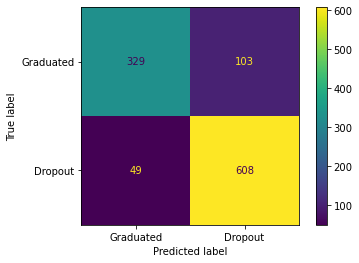

In [52]:
y_pred_lr = log_reg.predict(X_test)
print(y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [53]:
report = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score  support
0                 0.870   0.762     0.812   432.00
1                 0.855   0.925     0.889   657.00
accuracy          0.860   0.860     0.860     0.86
macro avg         0.863   0.843     0.851  1089.00
weighted avg      0.861   0.860     0.859  1089.00

In [54]:
print("Precision", precision_score(y_test, y_pred_lr, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_lr, average='weighted')*100, "%")

Precision 86.11779474840463 %
Recall 86.04224058769513 %


Decision Tree

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_decision_tree_train)
print("Test Set Accuracy", acc_decision_tree_test)

Train Set Accuracy: 100.0
Test Set Accuracy 81.27


[1 1 0 ... 1 1 0]


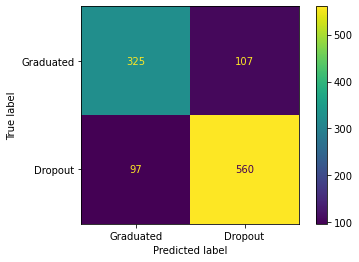

In [56]:
y_pred_dt = decision_tree.predict(X_test)
print(y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [57]:
report = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.770   0.752     0.761   432.000
1                 0.840   0.852     0.846   657.000
accuracy          0.813   0.813     0.813     0.813
macro avg         0.805   0.802     0.804  1089.000
weighted avg      0.812   0.813     0.812  1089.000

In [58]:
print("Precision", precision_score(y_test, y_pred_dt, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_dt, average='weighted')*100, "%")

Precision 81.20345451808974 %
Recall 81.26721763085399 %


Random Forest

In [59]:
#Hyperparameters n_estimator with 64, random_state starting with 0 to 100
random_forest = RandomForestClassifier(n_estimators=64, random_state=0)
random_forest.fit(X_train, y_train)

acc_random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_random_forest_train)
print("Test Set Accuracy", acc_random_forest_test)

Train Set Accuracy: 100.0
Test Set Accuracy 87.05


[1 1 0 ... 1 1 0]


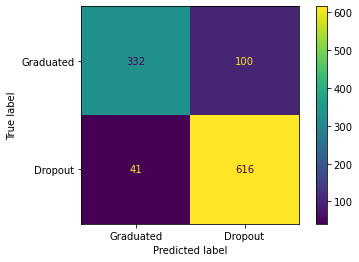

In [60]:
y_pred_rf = random_forest.predict(X_test)
print(y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [61]:
report = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.890   0.769     0.825   432.000
1                 0.860   0.938     0.897   657.000
accuracy          0.871   0.871     0.871     0.871
macro avg         0.875   0.853     0.861  1089.000
weighted avg      0.872   0.871     0.869  1089.000

In [62]:
print("Precision", precision_score(y_test, y_pred_rf, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_rf, average='weighted')*100, "%")

Precision 87.21349575500442 %
Recall 87.05234159779614 %


K-nearest neighnours

In [63]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_knn_train)
print("Test Set Accuracy", acc_knn_test)

Train Set Accuracy: 85.64
Test Set Accuracy 83.75


[1 1 1 ... 1 0 0]


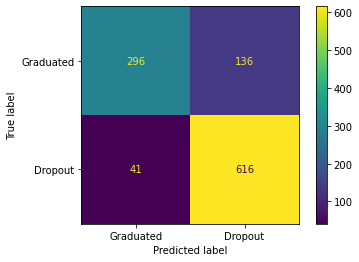

In [64]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [65]:
report = pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.878   0.685     0.770   432.000
1                 0.819   0.938     0.874   657.000
accuracy          0.837   0.837     0.837     0.837
macro avg         0.849   0.811     0.822  1089.000
weighted avg      0.843   0.837     0.833  1089.000

In [66]:
print("Precision", precision_score(y_test, y_pred_knn, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_knn, average='weighted')*100, "%")

Precision 84.26290060260295 %
Recall 83.7465564738292 %


Gaussian Naive Bayes

In [67]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_gaussian_train)
print("Test Set Accuracy", acc_gaussian_test)

Train Set Accuracy: 80.44
Test Set Accuracy 81.91


[1 1 1 ... 1 1 0]


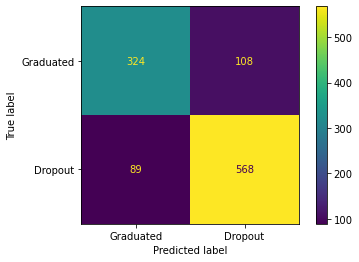

In [68]:
y_pred_gnb = gaussian.predict(X_test)
print(y_pred_gnb)
cm = confusion_matrix(y_test, y_pred_gnb)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [69]:
report = pd.DataFrame(classification_report(y_test, y_pred_gnb, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.785   0.750     0.767   432.000
1                 0.840   0.865     0.852   657.000
accuracy          0.819   0.819     0.819     0.819
macro avg         0.812   0.807     0.810  1089.000
weighted avg      0.818   0.819     0.818  1089.000

In [70]:
print("Precision", precision_score(y_test, y_pred_gnb, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_gnb, average='weighted')*100, "%")

Precision 81.81277061210686 %
Recall 81.91000918273646 %


Support Vector Machine (SVC)

In [71]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

acc_svc_train = round(svc.score(X_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_svc_train)
print("Test Set Accuracy", acc_svc_test)

Train Set Accuracy: 89.49
Test Set Accuracy 86.32


[1 1 1 ... 1 1 0]


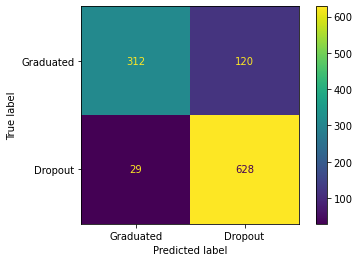

In [72]:
y_pred_svc = svc.predict(X_test)
print(y_pred_svc)
cm = confusion_matrix(y_test, y_pred_svc)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [73]:
report = pd.DataFrame(classification_report(y_test, y_pred_svc, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.915   0.722     0.807   432.000
1                 0.840   0.956     0.894   657.000
accuracy          0.863   0.863     0.863     0.863
macro avg         0.877   0.839     0.851  1089.000
weighted avg      0.869   0.863     0.860  1089.000

In [74]:
print("Precision", precision_score(y_test, y_pred_svc, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_svc, average='weighted')*100, "%")

Precision 86.94765174919486 %
Recall 86.31772268135904 %


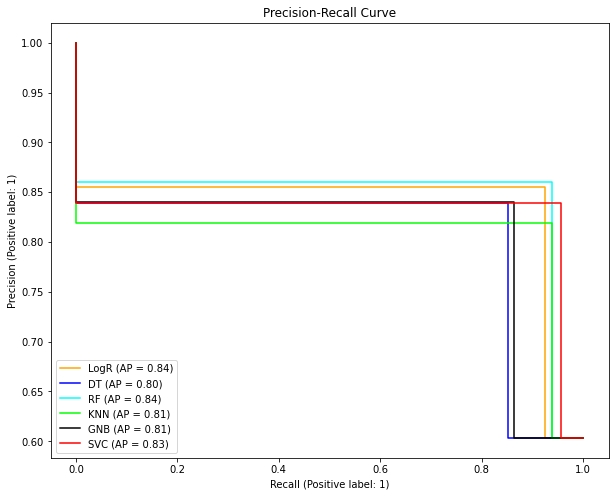

In [75]:

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LogR", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, ax = ax, name = "DT", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, ax = ax, name = "KNN", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, ax = ax, name = "GNB", color='black')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='red')

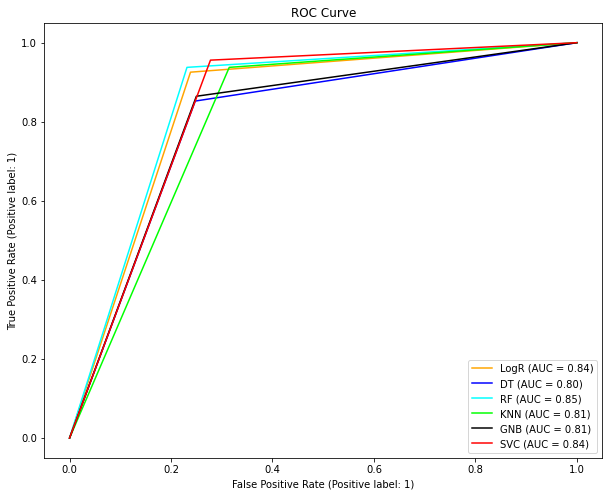

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LogR", color='orange')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, ax = ax, name = "DT", color='blue')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
RocCurveDisplay.from_predictions(y_test, y_pred_knn, ax = ax, name = "KNN", color='lime')
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, ax = ax, name = "GNB", color='black')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='red')

In [77]:
results = pd.DataFrame({
    'Models': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'KNN',
        'Gaussian Naive Bayes',
        'SVC'
    ],
    'Training Set Score': [
        acc_logr_train, 
        acc_decision_tree_train,
        acc_random_forest_train,
        acc_knn_train,
        acc_gaussian_train,
        acc_svc_train
    ],
    'Test Set Score': [
        acc_logr_test,         
        acc_decision_tree_test,
        acc_random_forest_test,
        acc_knn_test,
        acc_gaussian_test,
        acc_svc_test
    ]
}).sort_values('Test Set Score', ascending=False)

results.set_index("Models")

Training Set Score  Test Set Score
Models                                                  
Random Forest                     100.00           87.05
SVC                                89.49           86.32
Logistic Regression                86.86           86.04
KNN                                85.64           83.75
Gaussian Naive Bayes               80.44           81.91
Decision Tree                     100.00           81.27

### With Eliminating outliers and performing PCA.

In [78]:
df = pd.read_csv("Student_academic.csv")

In [79]:
org_shape = df.shape

In [80]:
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

In [81]:
labels = pd.Series(le.classes_)
pd.DataFrame(labels)

0
0   Dropout
1  Enrolled
2  Graduate

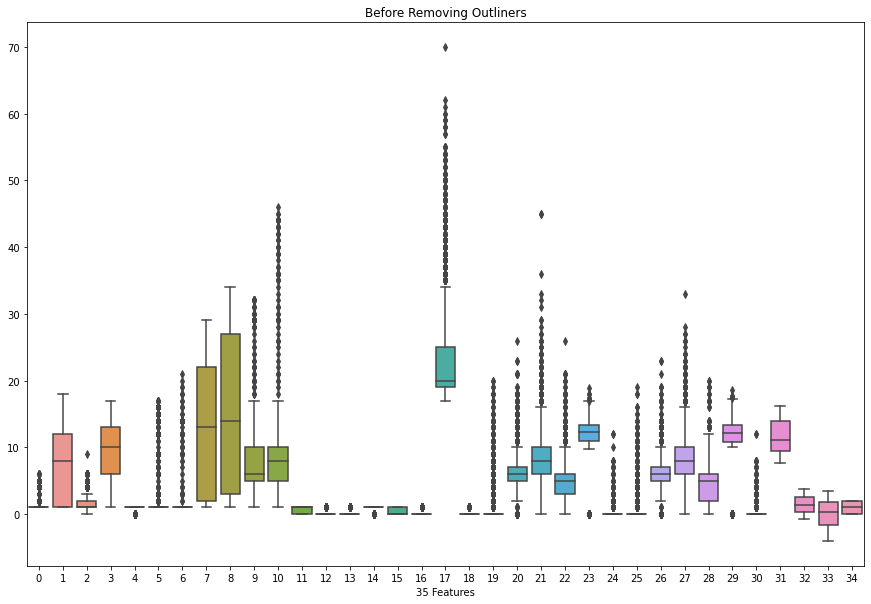

In [82]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df).set(xticklabels=list(range(35)), xlabel="35 Features", title="Before Removing Outliners")
plt.show()

In [83]:
#Using IQR for finding outliers
outlines_list = [2, 17, 20, 21, 22, 27]  #columns with outliers
outlines_data = df.iloc[:, outlines_list]

Q1 = outlines_data.quantile(0.05)
Q3 = outlines_data.quantile(0.92)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Removing outlier
df = df[((outlines_data > lower_limit) & (outlines_data < upper_limit)).all(axis=1)]

print("Number of eliminated outliners: ", (org_shape[0] - df.shape[0]))
print("Data shape after outliners elimination: ", df.shape)

Number of eliminated outliners:  108
Data shape after outliners elimination:  (4316, 35)


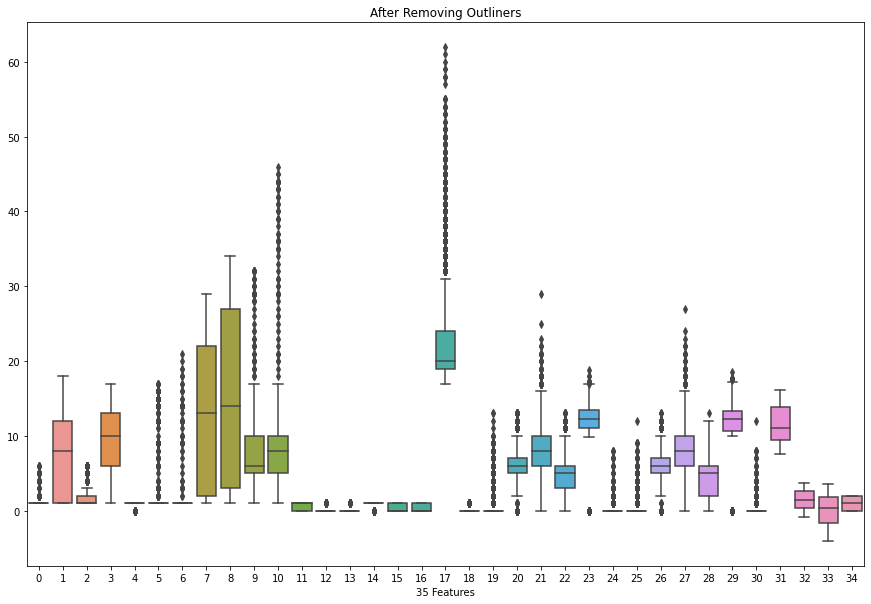

In [84]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df).set(xticklabels=list(range(35)), xlabel="35 Features", title="After Removing Outliners")
plt.show()

In [85]:
#Removing rows with Target == "enrolled"
df.drop(df[df['Target'] == 1].index, inplace = True)
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [86]:
#Replacing graduate with 1 and dropout with 0
df['Target'] = df['Target'].apply(lambda x: 1 if x==2 else 0)
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [87]:
X=df.drop("Target", axis=1)
y=df["Target"]

In [88]:
#Standardization
standard_scaler = StandardScaler()
X=standard_scaler.fit_transform(X)

In [89]:
#PCA
# Compute covarience matrix
cov_matrix = np.cov(X)

# Perform Singular Value Decomposition
U, s, Vh = np.linalg.svd(cov_matrix)

# Find effective k
k = np.argmax(s.cumsum() / s.sum() >= 0.99) + 1

print("k = ", k)

k =  29


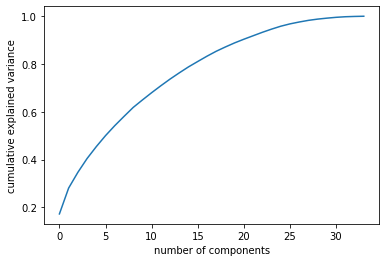

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [91]:
np.cumsum(pca.explained_variance_ratio_)[28]

0.9880049998176806

In [92]:
pca = PCA(n_components=k)
X = pca.fit_transform(X)

In [93]:
#Splitting into Training and Testing set, Traning data = 70% and Test data = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2469, 29) (1059, 29) (2469,) (1059,)


Logistic Regression

In [94]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

acc_logr_train = round(log_reg.score(X_train, y_train) * 100, 2)
acc_logr_test = round(log_reg.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_logr_train)
print("Test Set Accuracy", acc_logr_test)

Train Set Accuracy: 91.45
Test Set Accuracy 90.56


[0 1 1 ... 0 0 1]


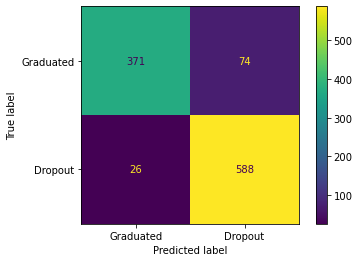

In [95]:
y_pred_lr = log_reg.predict(X_test)
print(y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [96]:
report = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.935   0.834     0.881   445.000
1                 0.888   0.958     0.922   614.000
accuracy          0.906   0.906     0.906     0.906
macro avg         0.911   0.896     0.901  1059.000
weighted avg      0.908   0.906     0.905  1059.000

In [97]:
print("Precision", precision_score(y_test, y_pred_lr, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_lr, average='weighted')*100, "%")

Precision 90.76694826120777 %
Recall 90.55712936732768 %


Desicion Tree 

In [98]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_decision_tree_train)
print("Test Set Accuracy", acc_decision_tree_test)

Train Set Accuracy: 100.0
Test Set Accuracy 81.21


[1 1 1 ... 1 0 1]


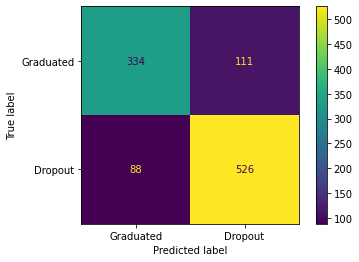

In [99]:
y_pred_dt = decision_tree.predict(X_test)
print(y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [100]:
report = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.791   0.751     0.770   445.000
1                 0.826   0.857     0.841   614.000
accuracy          0.812   0.812     0.812     0.812
macro avg         0.809   0.804     0.806  1059.000
weighted avg      0.811   0.812     0.811  1059.000

In [101]:
print("Precision", precision_score(y_test, y_pred_dt, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_dt, average='weighted')*100, "%")

Precision 81.13424369808855 %
Recall 81.20868744098206 %


Random Forest

In [102]:
#Hyperparameters n_estimator with 64, random_state starting with 0 to 100
random_forest = RandomForestClassifier(n_estimators=64, random_state=0)
random_forest.fit(X_train, y_train)

acc_random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_random_forest_train)
print("Test Set Accuracy", acc_random_forest_test)

Train Set Accuracy: 100.0
Test Set Accuracy 89.52


[1 1 1 ... 0 0 1]


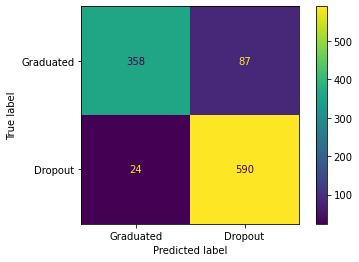

In [103]:
y_pred_rf = random_forest.predict(X_test)
print(y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [104]:
report = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.937   0.804     0.866   445.000
1                 0.871   0.961     0.914   614.000
accuracy          0.895   0.895     0.895     0.895
macro avg         0.904   0.883     0.890  1059.000
weighted avg      0.899   0.895     0.894  1059.000

In [105]:
print("Precision", precision_score(y_test, y_pred_rf, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_rf, average='weighted')*100, "%")

Precision 89.90914982375759 %
Recall 89.51841359773371 %


KNN - K Nearest Neighbours

In [106]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_knn_train)
print("Test Set Accuracy", acc_knn_test)

Train Set Accuracy: 88.38
Test Set Accuracy 85.84


[1 1 1 ... 0 0 1]


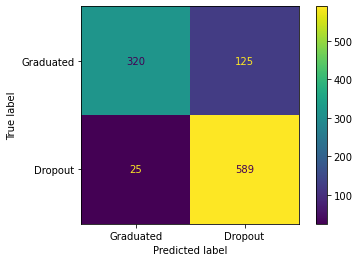

In [107]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [108]:
report = pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.928   0.719     0.810   445.000
1                 0.825   0.959     0.887   614.000
accuracy          0.858   0.858     0.858     0.858
macro avg         0.876   0.839     0.849  1059.000
weighted avg      0.868   0.858     0.855  1059.000

In [109]:
print("Precision", precision_score(y_test, y_pred_knn, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_knn, average='weighted')*100, "%")

Precision 86.80459168928482 %
Recall 85.8356940509915 %


Gaussian Naive Bayes

In [110]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_gaussian_train)
print("Test Set Accuracy", acc_gaussian_test)

Train Set Accuracy: 79.91
Test Set Accuracy 81.02


[1 1 0 ... 0 0 1]


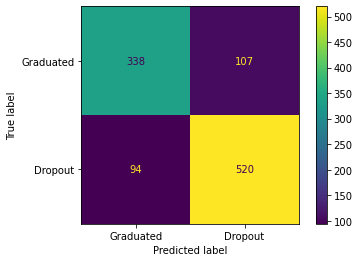

In [111]:
y_pred_gnb = gaussian.predict(X_test)
print(y_pred_gnb)
cm = confusion_matrix(y_test, y_pred_gnb)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [112]:
report = pd.DataFrame(classification_report(y_test, y_pred_gnb, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score  support
0                 0.782   0.760     0.771   445.00
1                 0.829   0.847     0.838   614.00
accuracy          0.810   0.810     0.810     0.81
macro avg         0.806   0.803     0.804  1059.00
weighted avg      0.810   0.810     0.810  1059.00

In [113]:
print("Precision", precision_score(y_test, y_pred_gnb, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_gnb, average='weighted')*100, "%")

Precision 80.9622093572941 %
Recall 81.01983002832861 %


SVC - Support Vector Machine

In [114]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

acc_svc_train = round(svc.score(X_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_svc_train)
print("Test Set Accuracy", acc_svc_test)

Train Set Accuracy: 93.72
Test Set Accuracy 90.46


[1 1 1 ... 0 0 1]


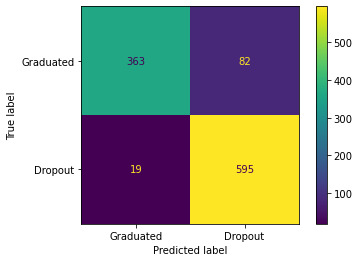

In [115]:
y_pred_svc = svc.predict(X_test)
print(y_pred_svc)
cm = confusion_matrix(y_test, y_pred_svc)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
cm.plot()

In [116]:
report = pd.DataFrame(classification_report(y_test, y_pred_svc, output_dict=True)).transpose()
display(round(report, 3))

precision  recall  f1-score   support
0                 0.950   0.816     0.878   445.000
1                 0.879   0.969     0.922   614.000
accuracy          0.905   0.905     0.905     0.905
macro avg         0.915   0.892     0.900  1059.000
weighted avg      0.909   0.905     0.903  1059.000

In [117]:
print("Precision", precision_score(y_test, y_pred_svc, average='weighted')*100, "%")
print("Recall", recall_score(y_test, y_pred_svc, average='weighted')*100, "%")

Precision 90.88736694315254 %
Recall 90.46270066100094 %


In [118]:
results = pd.DataFrame({
    'Models': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'KNN',
        'Gaussian Naive Bayes',
        'SVC'
    ],
    'Training Set Score': [
        acc_logr_train, 
        acc_decision_tree_train,
        acc_random_forest_train,
        acc_knn_train,
        acc_gaussian_train,
        acc_svc_train
    ],
    'Test Set Score': [
        acc_logr_test,         
        acc_decision_tree_test,
        acc_random_forest_test,
        acc_knn_test,
        acc_gaussian_test,
        acc_svc_test
    ]
}).sort_values('Test Set Score', ascending=False)

results.set_index("Models")

Training Set Score  Test Set Score
Models                                                  
Logistic Regression                91.45           90.56
SVC                                93.72           90.46
Random Forest                     100.00           89.52
KNN                                88.38           85.84
Decision Tree                     100.00           81.21
Gaussian Naive Bayes               79.91           81.02

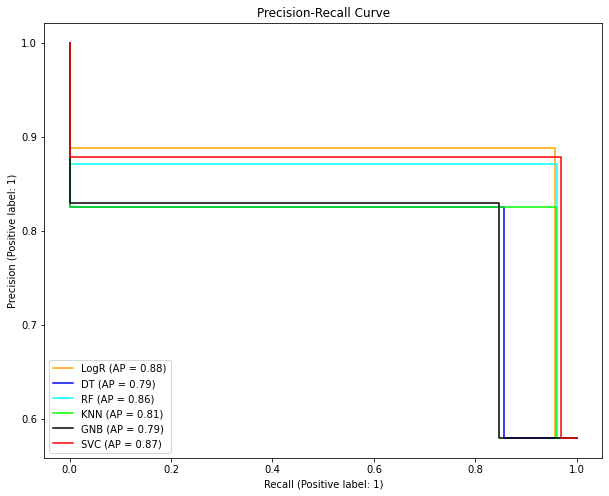

In [119]:

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LogR", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, ax = ax, name = "DT", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, ax = ax, name = "KNN", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, ax = ax, name = "GNB", color='black')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='red')

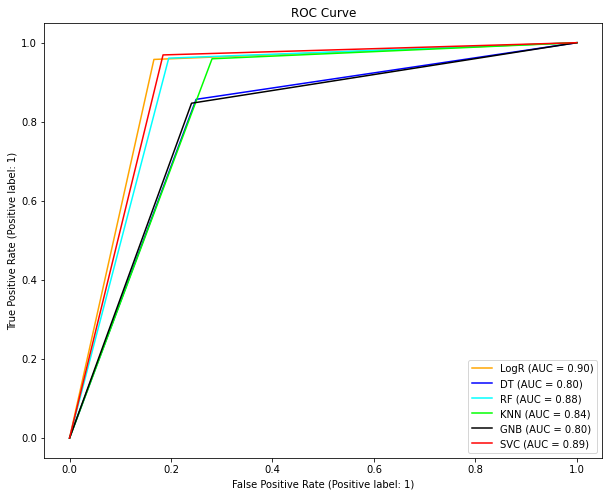

In [120]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LogR", color='orange')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, ax = ax, name = "DT", color='blue')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
RocCurveDisplay.from_predictions(y_test, y_pred_knn, ax = ax, name = "KNN", color='lime')
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, ax = ax, name = "GNB", color='black')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='red')